In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
class ValidationObject:

    def __init__(self,kp,tn,tv) -> None:
        self.kp=kp
        self.tn=tn
        self.tv=tv
        self.history = []
        self.setPoints = []
        self.controllerOutputs = []


In [2]:
data = pd.read_csv("./dataFromTest.csv",sep=";")

1.36 75 10 3359.2784000000033


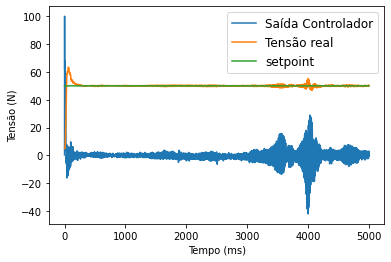

1.36 75 20 15616.027000000002


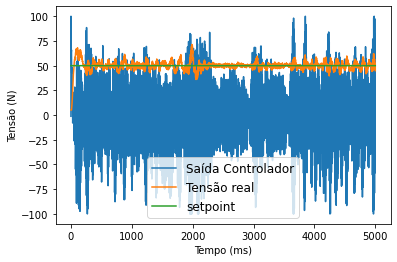

1.36 57 20 12716.712600000003


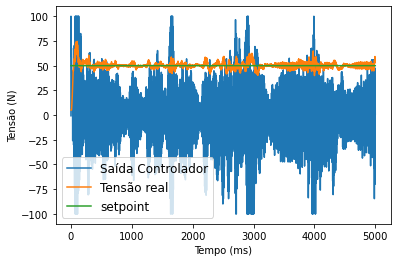

1.36 57 10 3136.0840000000053


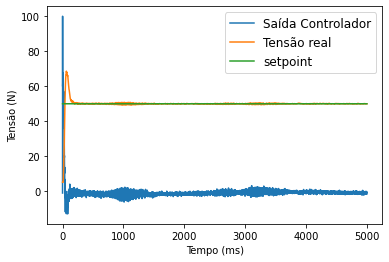

1.43 68 43 37071.417400000006


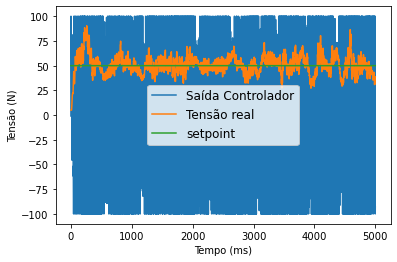

1.0 40 0 6976.446200000004


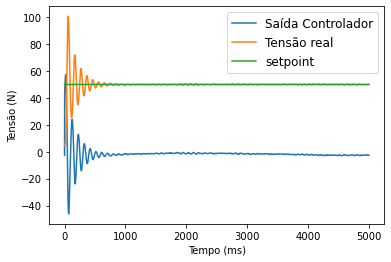

0.7 50 5 5179.056600000004


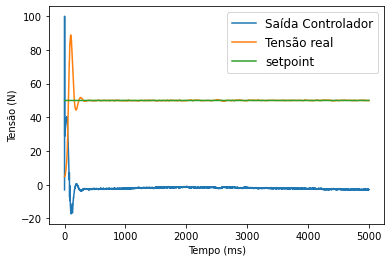

0.5 35 10 7862.888400000003


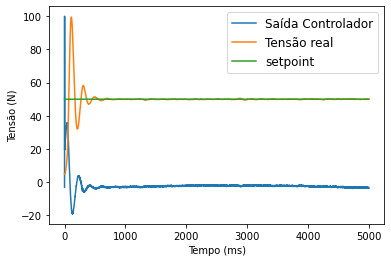

1.5 20 30 33385.267400000004


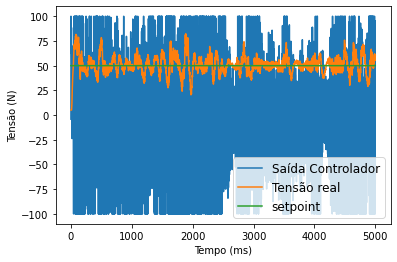

In [3]:
validation=[]
last = None
for i in data.index:
    if data["runningPreTest"][i]==1 and data["runningTest"][i+1]==1:
        last =ValidationObject(data["kp"][i+2],data["tnLreal"][i+2],data["tvLreal"][i+2])
        validation.append(last)
    if data["runningTest"][i]:
        last.history.append(data["aMeasuredTension[1]"][i])
        last.setPoints.append(data["lrSetPointTension"][i])
        last.controllerOutputs.append(data["lrPIDVelocity"][i])

for validationObj in validation:
    plt.plot(validationObj.controllerOutputs,label="Saída Controlador")
    plt.plot(validationObj.history,label="Tensão real")
    plt.plot(validationObj.setPoints,label="setpoint")
    plt.xlabel("Tempo (ms)")
    plt.ylabel("Tensão (N)")
    print(validationObj.kp,validationObj.tn,validationObj.tv,np.sum(np.abs(np.array(validationObj.setPoints) - np.array(validationObj.history)))) 
    plt.legend(fontsize="12")
    plt.show()
        